In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# in taxt clasification we all consider two column, the text and outcome

<Axes: >

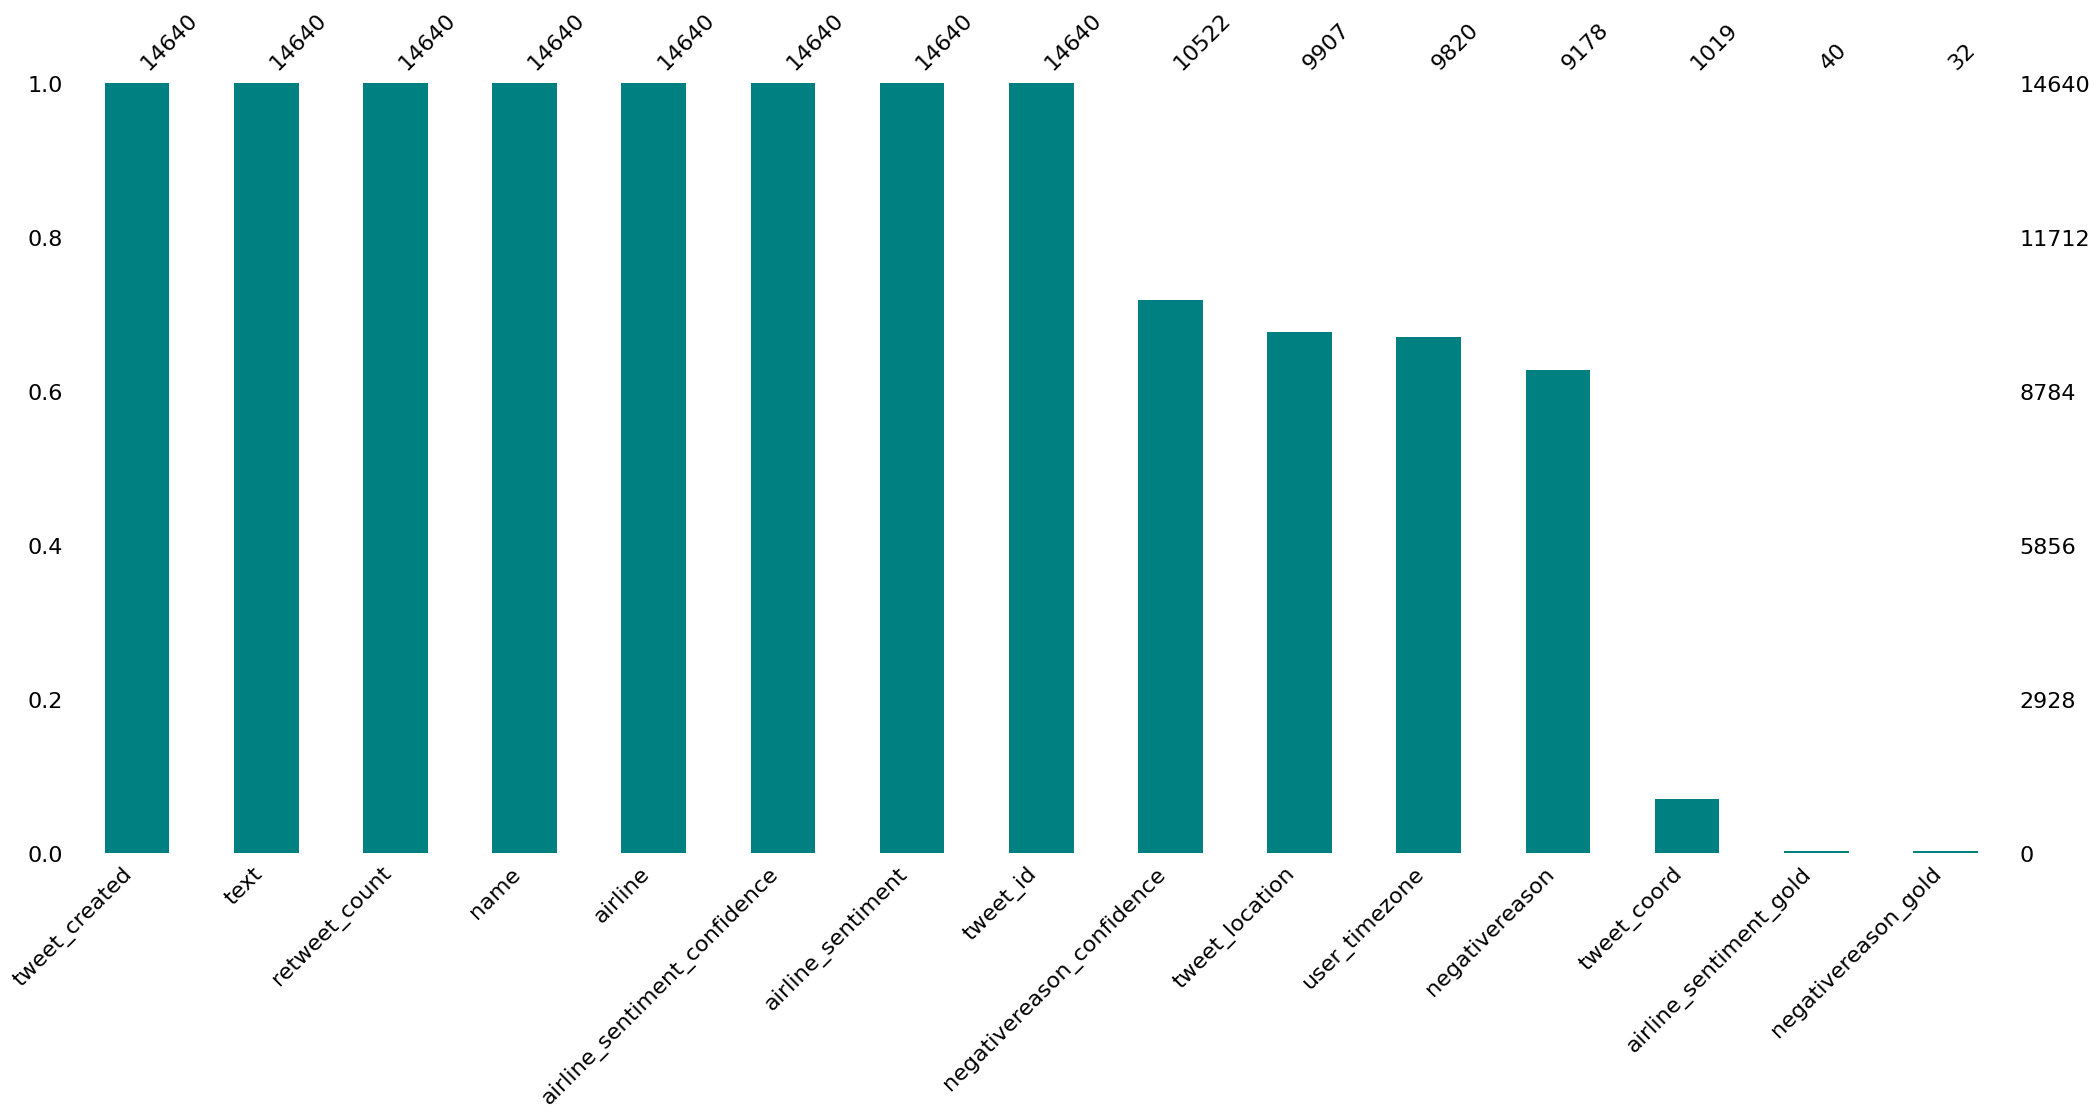

In [6]:
mns.bar(df, color='teal', sort= 'descending')

In [7]:
fig = px.histogram(x = df['airline'], text_auto= True,color = df['negativereason'])
fig.show()

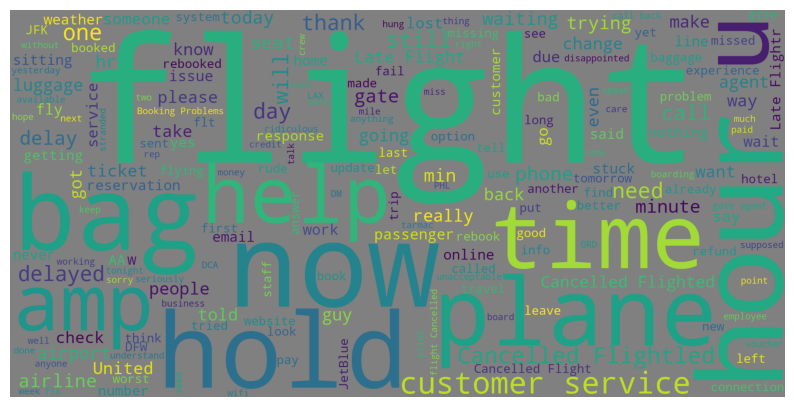

In [12]:
#wordcloud is a color graphical representation of text
newdata = df[df['airline_sentiment'] == 'negative']
words = "  ".join(newdata['text'])
clw = "  ".join([word for word in words.split()  if 'http' not in  word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords = STOPWORDS, background_color='grey', width = 2000, height=1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

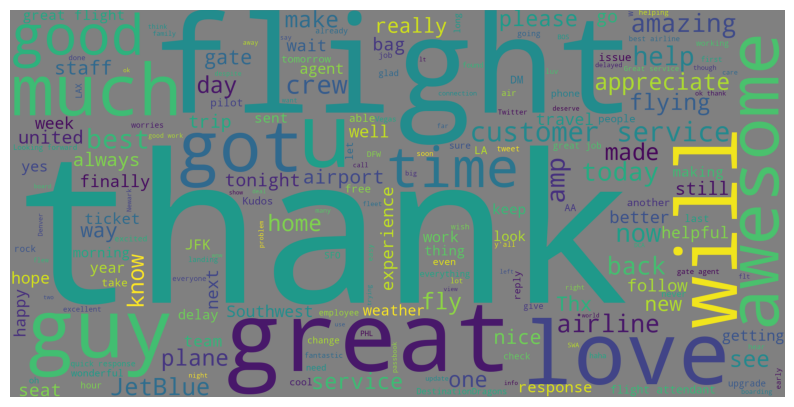

In [13]:
#wordcloud is a color graphical representation of text
newdata = df[df['airline_sentiment'] == 'positive']
words = "  ".join(newdata['text'])
clw = "  ".join([word for word in words.split()  if 'http' not in  word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords = STOPWORDS, background_color='grey', width = 2000, height=1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [29]:

df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [33]:
from sklearn.utils import resample
df_negative = df[df['airline_sentiment'] == 'negative']
df_neutral = df[df['airline_sentiment'] == 'neutral']
df_positive = df[df['airline_sentiment'] == 'positive']
dg_sam1 = resample(df_neutral, n_samples= 9178)
dg_sam2 = resample(df_positive, n_samples= 9178)
df = pd.concat([df_negative, dg_sam1,dg_sam2], ignore_index=True)
df= df.sample(frac= 1)
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    9178
neutral     9178
Name: count, dtype: int64

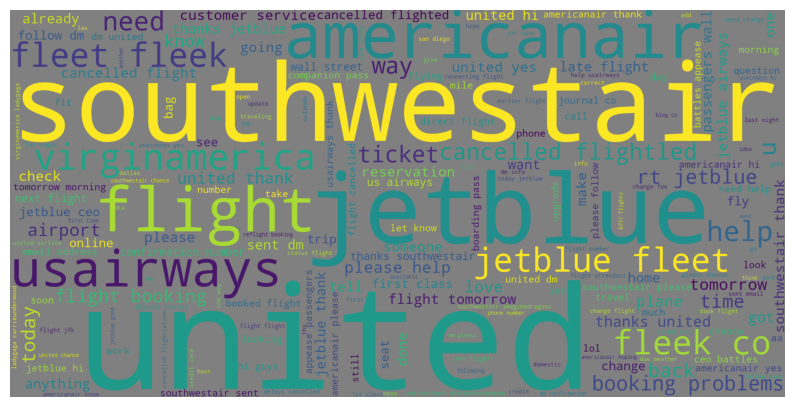

In [35]:
#wordcloud is a color graphical representation of text
newdata = df[df['airline_sentiment'] == 'neutral']
words = "  ".join(newdata['text'])
clw = "  ".join([word for word in words.split()  if 'http' not in  word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords = STOPWORDS, background_color='grey', width = 2000, height=1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [36]:
# prepare text foe machine learning
text_cleaning_re = "@\s+|htt?:\s+http?\s|[^A-za-z0-9]+"
def preprocess(x, stem = False):
    x = re.sub(text_cleaning_re, " ",str(x).lower()).strip()
    tokens = []
    for token in x.split():
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: preprocess(x))                        

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\PC\AppData\Local\Temp\ipykernel_11620\3082320752.py:2: SyntaxWarning:

invalid escape sequence '\s'



In [37]:
x = df.text
y = df['airline_sentiment']
xtrain,xtext,ytrain,ytext = train_test_split(x,y, test_size = 0.2, random_state=1)
from sklearn.pipeline import Pipeline
clf1 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model', MultinomialNB())])
clf2 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model', BernoulliNB())])
clf3 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model', MLPClassifier())])

In [38]:
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('model', MultinomialNB())])

In [39]:
pred1 = clf1.predict(xtext)
print(classification_report(ytext,pred1))

              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      1790
     neutral       0.84      0.79      0.81      1856
    positive       0.87      0.89      0.88      1861

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507



In [40]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('transformer', TfidfTransformer()), ('model', BernoulliNB())])

In [41]:
pred2 = clf2.predict(xtext)
print(classification_report(ytext,pred2))

              precision    recall  f1-score   support

    negative       0.83      0.80      0.82      1790
     neutral       0.82      0.81      0.82      1856
    positive       0.85      0.90      0.87      1861

    accuracy                           0.84      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.83      0.84      0.83      5507



In [ ]:
clf3.fit(xtrain,ytrain)

In [ ]:
pred3 = clf3.predict(xtext)
print(classification_report(ytext,pred2))

In [ ]:
#gridsearch is a machine learing feature that tone each  algorith paramenter to get the best possible outcome

In [ ]:
from sklearn.model_selection import GridSearchCV
prag)